---
# Data Processing
---

### Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

---
### Binary Encoding of RainToday/Tomorrow

In [34]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [35]:
# One Hot Encoding

# Update RainToday column
raintoday = pd.get_dummies(df['RainToday'])  
df['RainToday'] = raintoday['Yes']

# Update RainTomorrow column
raintomorrow = pd.get_dummies(df['RainTomorrow'])  
df['RainTomorrow'] = raintomorrow['Yes']

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1,0


---
### Remove NaNs 

In [36]:
# Remove columns with over 1/3 NaNs
df.drop(['Evaporation', 'Sunshine', 'Rainfall', 'Cloud9am', 'Cloud3pm'], axis = 1, inplace = True) 
df.head()

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [37]:
# Drop NaN values
df.dropna(inplace = True) 
df

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,2017-06-21,Uluru,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


---
### Initial Descriptions

In [38]:
df.describe()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000,115415.000000
mean,12.672407,23.644513,40.828081,15.216688,19.516371,67.459732,50.740320,1017.422445,1015.049384,17.459860,22.115102,0.221921,0.220994
std,6.238970,6.971647,13.338630,8.362088,8.586030,18.875427,20.750281,7.033366,6.958978,6.341598,6.826803,0.415540,0.414918
min,-8.200000,2.600000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000
25%,8.100000,18.300000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,0.000000,0.000000
50%,12.400000,23.100000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,0.000000,0.000000
75%,17.200000,28.700000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,0.000000,0.000000
max,33.900000,48.100000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


---
### Correlation Matrix & removing high Correlations

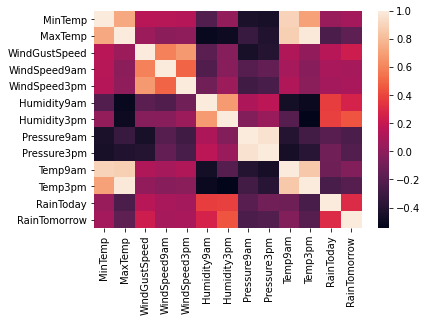

In [40]:
# Correlation Matrix attributes with other attributes

corr_map = sns.heatmap(df.corr())
corr_map

In [41]:
correlate = df.corr()
correlate

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.728610,0.159282,0.150052,0.145654,-0.217067,0.026907,-0.433600,-0.448056,0.898502,0.703989,0.043948,0.077364
MaxTemp,0.728610,1.000000,0.056850,-0.005989,0.013626,-0.515588,-0.497169,-0.312804,-0.411641,0.884949,0.984276,-0.240498,-0.167040
WindGustSpeed,0.159282,0.056850,1.000000,0.590132,0.678569,-0.183934,-0.021263,-0.446087,-0.400743,0.124632,0.018299,0.152262,0.234628
WindSpeed9am,0.150052,-0.005989,0.590132,1.000000,0.498255,-0.222205,-0.018744,-0.202463,-0.151562,0.089087,-0.019171,0.097250,0.091620
WindSpeed3pm,0.145654,0.013626,0.678569,0.498255,1.000000,-0.093797,0.052981,-0.285172,-0.245085,0.126241,-0.011790,0.086494,0.095698
Humidity9am,-0.217067,-0.515588,-0.183934,-0.222205,-0.093797,1.000000,0.683476,0.116009,0.168641,-0.463127,-0.508436,0.374266,0.273124
Humidity3pm,0.026907,-0.497169,-0.021263,-0.018744,0.052981,0.683476,1.000000,-0.034903,0.046907,-0.201721,-0.547002,0.382146,0.448708
Pressure9am,-0.433600,-0.312804,-0.446087,-0.202463,-0.285172,0.116009,-0.034903,1.000000,0.960230,-0.400322,-0.270688,-0.186420,-0.239226
Pressure3pm,-0.448056,-0.411641,-0.400743,-0.151562,-0.245085,0.168641,0.046907,0.960230,1.000000,-0.453182,-0.378721,-0.103529,-0.219729
Temp9am,0.898502,0.884949,0.124632,0.089087,0.126241,-0.463127,-0.201721,-0.400322,-0.453182,1.000000,0.859775,-0.112951,-0.035530


In [42]:
correlated_features = set()

for i in range(len(correlate.columns)):
    for j in range(i):
        if abs(correlate.iloc[i, j]) > 0.85:
            colname = correlate.columns[i]
            correlated_features.add(colname)
            
df.drop(labels=correlated_features, axis=1, inplace=True)

In [43]:
df.head()

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,0,0
1,2008-12-02,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,0,0
2,2008-12-03,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,0,0
3,2008-12-04,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,0,0
4,2008-12-05,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,0,0


---
### Undersampling the data

Text(0.5, 1.0, 'Dataset Balance')

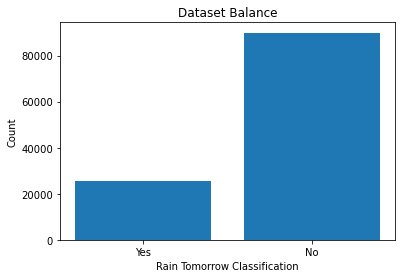

In [44]:
# Barplot to display original balance of data

sum_yes = df['RainTomorrow'].sum()
sum_no = len(df) - sum_yes

x_labels = ['Yes', 'No']
y_labels = [sum_yes, sum_no]

plt.bar(x_labels, y_labels)
plt.xlabel('Rain Tomorrow Classification')
plt.ylabel('Count')
plt.title('Dataset Balance')

In [48]:
# Undersampling
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]
RUS = RandomUnderSampler(random_state=42)
X_und, y_und = RUS.fit_sample(X, y)

Text(0.5, 1.0, 'Dataset Balance')

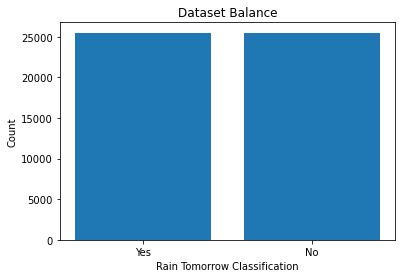

In [50]:
# Barplot of data after undersampling

sum_yes = y_und.sum()
sum_no = len(y_und) - sum_yes

x_labels = ['Yes', 'No']
y_labels = [sum_yes, sum_no]

plt.bar(x_labels, y_labels)
plt.xlabel('Rain Tomorrow Classification')
plt.ylabel('Count')
plt.title('Dataset Balance')

---
### Split into testing and training data

In [53]:
train_X, test_X, train_y, test_y = train_test_split(X_und, y_und, test_size=0.25, random_state=42)

---
# Machine Learning Models
---

## Logistic Regression Implementation

In [58]:
# Add bias column
def add_const(dataframe):
    n, k = dataframe.shape
    ones = np.ones((n, 1))
    return np.concatenate([ones, dataframe], axis = 1)

def prediction(values):
    if values >= 0.5:
        return 1
    else:
        return 0

In [59]:
class GDLogReg:
    def __init__(self):
        self.theta = None

    def predict(self, X):
        X = add_const(X)
        predicted_values = X @ self.theta
        
        return[prediction(x) for x in predicted_values]

    def fit(self, X, y, l_rate=.01, epochs=100, epsilon=.0001, log=False):

        # Add bias column
        X = add_const(X)
        
        n, d = X.shape

        # 1. initialize theta at random
        self.theta = np.zeros(d)

        # 2. repeat until stopping conditions
        for epoch in range(epochs):
            theta_old = self.theta
            
            # Apply sigmoid function
            h_theta = (1/ (1 + np.exp(-(X @ self.theta))))
            residuals = h_theta - y 
            gradient = residuals @ X

            # 3. Update theta
            self.theta = theta_old - l_rate * gradient
            difference = np.linalg.norm(self.theta - theta_old)

            if log:
                print(f'iter: {epoch}\tdif: {difference}')

            # Check for convergence
            if epsilon > difference:
                break 

        return self

lr_gd = GDLogReg()
lr_gd.fit(train_X, train_y, l_rate=.01, epsilon=1e-6, log = False)
pd.Series(lr_gd.theta, index = ['constant'] + list(train_X))

TypeError: can't multiply sequence by non-int of type 'float'

In [28]:
def get_indexed(dictionary):
    
    return pd.DataFrame(dictionary).set_index(['l_rate', 'epochs'])

    l_rates, epochs = [.01, .1, .5], [10, 50, 100]
    cross_entropy, metrics = [], []

    for l_rate in l_rates:
        for epoc in epochs:
            lr_gd = GDLogReg().fit(x_train, y_train, l_rate, epoc)

            train_pred = lr_gd.predict(x_train)
            test_pred = lr_gd.predict(x_test)

        
        # Cross entropy loss objective
        params_cross_entropy = {
            'l_rate': l_rate,
            'epochs': epoc
        }
        
        params_cross_entropy.update(
                                    {
                                        'cross_entropy_train': log_loss(y_train, train_pred),
                                        'cross_entropy_test': log_loss(y_test, test_pred)
                                    })
        cross_entropy.append(params_cross_entropy)
        
        # Metrics for 100 iterations
        params_metrics = {
            'l_rate': l_rate,
            'epochs': epoc
        }
        
        if epoc == 100:
            
            params_metrics.update(
                                    {
                                     'accuracy_train': accuracy_score(y_train, train_pred),
                                     'accuracy_test': accuracy_score(y_test, test_pred),
                                     'precision_train': precision_score(y_train, train_pred),
                                     'precision_test': precision_score(y_test, test_pred),
                                     'recall_train': recall_score(y_train, train_pred),
                                     'recall_test': recall_score(y_test, test_pred),
                                     'f1_train': f1_score(y_train, train_pred),
                                     'f1_test': f1_score(y_test, test_pred)
                                    })
            metrics.append(params_metrics)

In [29]:
get_indexed()

TypeError: get_indexed() missing 1 required positional argument: 'dictionary'

In [30]:
get_indexed()

TypeError: get_indexed() missing 1 required positional argument: 'dictionary'